In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df=pd.read_csv(r"C:\yeraki vachuruken\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [90]:
#Data Clening
df.duplicated().sum()
df=df.drop_duplicates()
df['sex']=df['sex'].replace({1:'Male',0:'Female'})
df['exang']=df['exang'].replace({0:'No',1:'Yes'})
df['fbs']=df['fbs'].replace({0:'No',1:'Yes'})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,zscore
0,52,Male,0,125,212,No,1,168,No,1.0,2,2,3,0,-0.666622
1,53,Male,0,140,203,Yes,0,155,Yes,3.1,0,0,3,0,-0.840523
2,70,Male,0,145,174,No,1,125,Yes,2.6,0,0,3,0,-1.400872
3,61,Male,0,148,203,No,1,161,No,0.0,2,1,3,0,-0.840523
4,62,Female,0,138,294,Yes,1,106,No,1.9,1,3,2,0,0.917813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Female,2,120,211,No,0,115,No,1.5,1,0,2,1,-0.685944
733,44,Female,2,108,141,No,1,175,No,0.6,1,0,2,1,-2.038510
739,52,Male,0,128,255,No,1,161,Yes,0.0,2,1,3,0,0.164240
843,59,Male,3,160,273,No,0,125,No,0.0,2,0,2,0,0.512043


In [67]:
#Outliners
df['zscore']=(df['chol']-df['chol'].mean())/df['chol'].std()
outliers_z = df[(df['zscore'] > 3) | (df['zscore'] < -3)] 
print(outliers_z)

     age     sex  cp  trestbps  chol  fbs  restecg  thalach exang  oldpeak  \
123   65  Female   2       140   417  Yes        0      157    No      0.8   
158   67  Female   2       115   564   No        0      160    No      1.6   
179   56  Female   0       134   409   No        0      150   Yes      1.9   
450   63  Female   0       150   407   No        0      154    No      4.0   

     slope  ca  thal  target    zscore  
123      2   1     2       1  3.294464  
158      1   0     3       1  6.134852  
179      1   2     3       0  3.139885  
450      1   3     3       0  3.101240  


C:\Users\jnmon\AppData\Local\Temp\ipykernel_18628\7805460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore']=(df['chol']-df['chol'].mean())/df['chol'].std()


In [69]:
#EDA
df.describe()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,target,zscore
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,3.020000e+02
mean,54.42053,0.963576,131.602649,246.500000,0.526490,149.569536,1.043046,1.397351,0.718543,2.314570,0.543046,-2.940988e-18
std,9.04797,1.032044,17.563394,51.753489,0.526027,22.903527,1.161452,0.616274,1.006748,0.613026,0.498970,1.000000e+00
min,29.00000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.328345e+00
25%,48.00000,0.000000,120.000000,211.000000,0.000000,133.250000,0.000000,1.000000,0.000000,2.000000,0.000000,-6.859441e-01
50%,55.50000,1.000000,130.000000,240.500000,1.000000,152.500000,0.800000,1.000000,0.000000,2.000000,1.000000,-1.159342e-01
75%,61.00000,2.000000,140.000000,274.750000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000,1.000000,5.458569e-01
max,77.00000,3.000000,200.000000,564.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000,1.000000,6.134852e+00


In [92]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    object 
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    object 
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
 14  zscore    302 non-null    float64
dtypes: float64(2), int64(10), object(3)
memory usage: 37.8+ KB


Text(0.5, 0, 'All Datas')

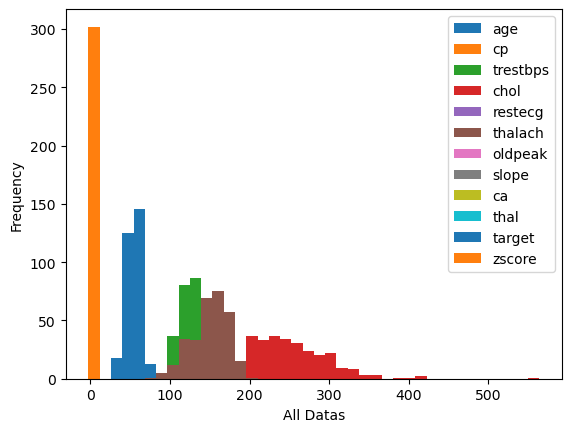

In [73]:
#Visualization
df.plot.hist(bins=40)
plt.xlabel("All Datas")

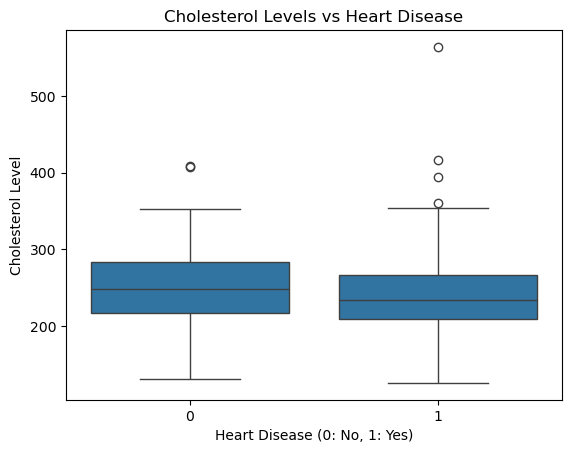

In [75]:
#Relationship between cholesterol levels and the likelihood of heart disease
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels vs Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Cholesterol Level')
plt.show()

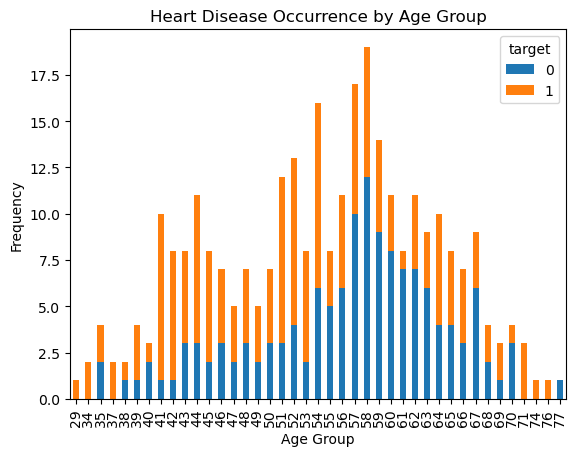

In [94]:
#age group has the highest occurrence of heart disease
age_group_heart_disease = df.groupby('age')['target'].value_counts().unstack().fillna(0)
age_group_heart_disease.plot(kind='bar', stacked=True)
plt.title('Heart Disease Occurrence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

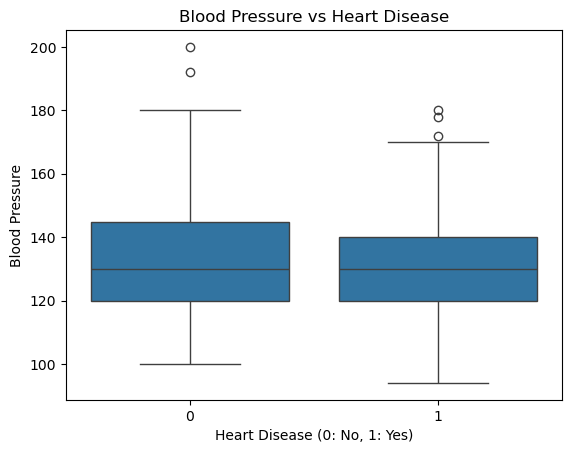

In [79]:
# Blood pressure vs heart disease occurrence
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Blood Pressure vs Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Blood Pressure')
plt.show()

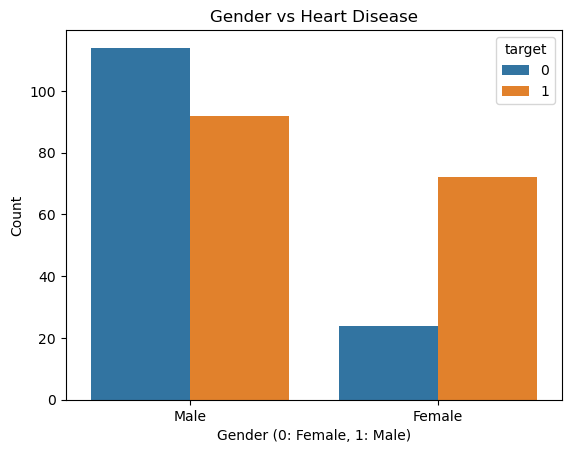

In [81]:
#Males or females show a higher tendency towards heart disease
sns.countplot(x='sex', hue='target', data=df)
plt.title('Gender vs Heart Disease')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

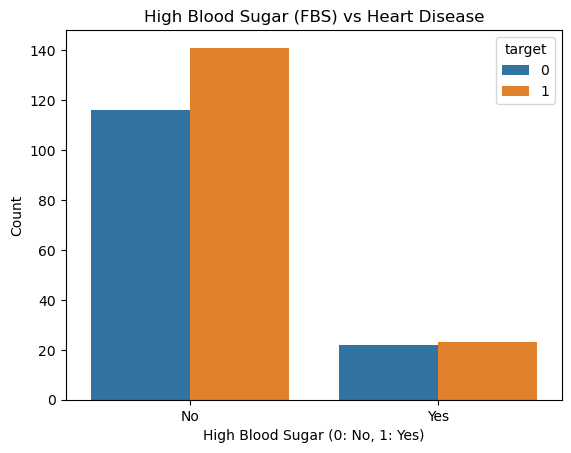

In [83]:
#High blood sugar correlate with heart disease prevalence
sns.countplot(x='fbs', hue='target', data=df)
plt.title('High Blood Sugar (FBS) vs Heart Disease')
plt.xlabel('High Blood Sugar (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

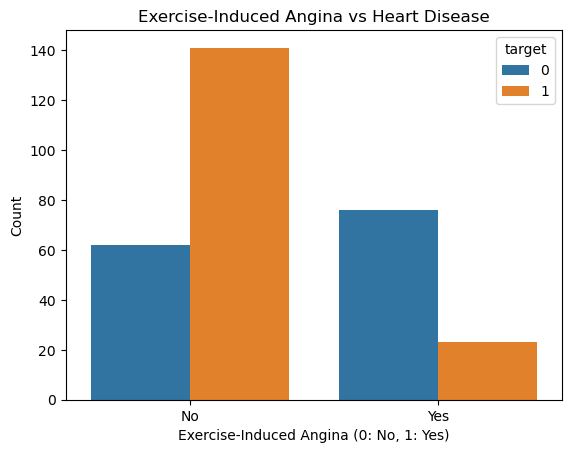

In [85]:
#Exercise level vs heart disease
sns.countplot(x='exang', hue='target', data=df)
plt.title('Exercise-Induced Angina vs Heart Disease')
plt.xlabel('Exercise-Induced Angina (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

             age      chol    target
age     1.000000  0.207216 -0.221476
chol    0.207216  1.000000 -0.081437
target -0.221476 -0.081437  1.000000


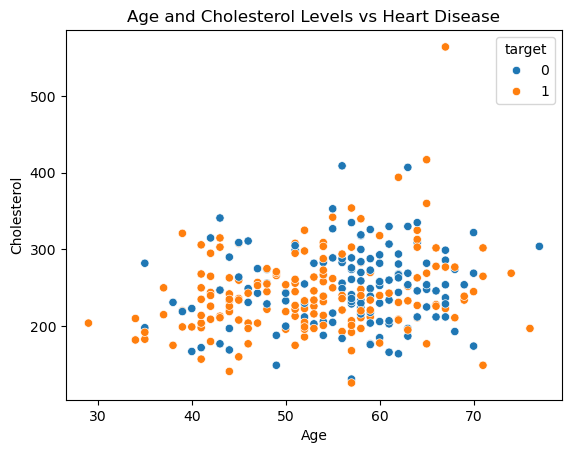

In [87]:
#Age and cholesterol levels on the likelihood of having heart disease
correlation = df[['age', 'chol', 'target']].corr()
print(correlation)
sns.scatterplot(x='age', y='chol', hue='target', data=df)
plt.title('Age and Cholesterol Levels vs Heart Disease')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()